In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import sounddevice as sd
import random

In [2]:
# Lấy list wav files từ 1 folder
def get_wav_files(folder_path):
    wav_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".wav"):
                wav_files.append(os.path.join(root, file))
    return wav_files

base_audio_train_folder = "NguyenAmHuanLuyen-16k"
audio_train_folders = [os.path.join(base_audio_train_folder, folder) for folder in os.listdir(base_audio_train_folder)]
audio_train_file_paths = []
for folder in audio_train_folders:
    item = {
        'folder_name': folder.split('/')[1],
        'audio_files': get_wav_files(folder)
    }
    audio_train_file_paths.append(item)

print(audio_train_file_paths)

[{'folder_name': '43MNT', 'audio_files': ['NguyenAmHuanLuyen-16k/43MNT/i.wav', 'NguyenAmHuanLuyen-16k/43MNT/o.wav', 'NguyenAmHuanLuyen-16k/43MNT/a.wav', 'NguyenAmHuanLuyen-16k/43MNT/u.wav', 'NguyenAmHuanLuyen-16k/43MNT/e.wav']}, {'folder_name': '34MQP', 'audio_files': ['NguyenAmHuanLuyen-16k/34MQP/i.wav', 'NguyenAmHuanLuyen-16k/34MQP/o.wav', 'NguyenAmHuanLuyen-16k/34MQP/a.wav', 'NguyenAmHuanLuyen-16k/34MQP/u.wav', 'NguyenAmHuanLuyen-16k/34MQP/e.wav']}, {'folder_name': '36MAQ', 'audio_files': ['NguyenAmHuanLuyen-16k/36MAQ/i.wav', 'NguyenAmHuanLuyen-16k/36MAQ/o.wav', 'NguyenAmHuanLuyen-16k/36MAQ/a.wav', 'NguyenAmHuanLuyen-16k/36MAQ/u.wav', 'NguyenAmHuanLuyen-16k/36MAQ/e.wav']}, {'folder_name': '44MTT', 'audio_files': ['NguyenAmHuanLuyen-16k/44MTT/i.wav', 'NguyenAmHuanLuyen-16k/44MTT/o.wav', 'NguyenAmHuanLuyen-16k/44MTT/a.wav', 'NguyenAmHuanLuyen-16k/44MTT/u.wav', 'NguyenAmHuanLuyen-16k/44MTT/e.wav']}, {'folder_name': '33MHP', 'audio_files': ['NguyenAmHuanLuyen-16k/33MHP/i.wav', 'NguyenAm

In [7]:
# Hàm chọn random 4 phần tử trong mảng
def random_select_4_elements(arr):
    selected_elements = random.sample(arr, 4)
    return selected_elements

seletected_elements_folder_audio_data = random_select_4_elements(audio_train_file_paths)
seletected_elements_folder_audio_data = audio_train_file_paths[0:4]


seletected_elements_folder_audio_data = []
for item in audio_train_file_paths:
    if item['folder_name'] == '27MCM' or item['folder_name'] == '30FTN' or item['folder_name'] == '35MMQ' or item['folder_name'] == '36MAQ':
        seletected_elements_folder_audio_data.append(item)
print(seletected_elements_folder_audio_data)


[{'folder_name': '36MAQ', 'audio_files': ['NguyenAmHuanLuyen-16k/36MAQ/i.wav', 'NguyenAmHuanLuyen-16k/36MAQ/o.wav', 'NguyenAmHuanLuyen-16k/36MAQ/a.wav', 'NguyenAmHuanLuyen-16k/36MAQ/u.wav', 'NguyenAmHuanLuyen-16k/36MAQ/e.wav']}, {'folder_name': '35MMQ', 'audio_files': ['NguyenAmHuanLuyen-16k/35MMQ/i.wav', 'NguyenAmHuanLuyen-16k/35MMQ/o.wav', 'NguyenAmHuanLuyen-16k/35MMQ/a.wav', 'NguyenAmHuanLuyen-16k/35MMQ/u.wav', 'NguyenAmHuanLuyen-16k/35MMQ/e.wav']}, {'folder_name': '30FTN', 'audio_files': ['NguyenAmHuanLuyen-16k/30FTN/i.wav', 'NguyenAmHuanLuyen-16k/30FTN/o.wav', 'NguyenAmHuanLuyen-16k/30FTN/a.wav', 'NguyenAmHuanLuyen-16k/30FTN/u.wav', 'NguyenAmHuanLuyen-16k/30FTN/e.wav']}, {'folder_name': '27MCM', 'audio_files': ['NguyenAmHuanLuyen-16k/27MCM/i.wav', 'NguyenAmHuanLuyen-16k/27MCM/o.wav', 'NguyenAmHuanLuyen-16k/27MCM/a.wav', 'NguyenAmHuanLuyen-16k/27MCM/u.wav', 'NguyenAmHuanLuyen-16k/27MCM/e.wav']}]


In [14]:
# Hàm tạo plot mel spectrogram
def plot_mel_spectrogram(y, sr, n_fft=256, hop_length=64, time_division=0.2, title="Mel spectrogram"):
    mel_spectrogram = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

    # Chuyển spectrogram sang db scale
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Vẽ biểu đồ mel spectrogram
    plt.figure(figsize=(12,4))
    librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='linear', sr=sr, hop_length=hop_length, cmap='jet')
    plt.colorbar(format='%+2.0f dB')

    # time
    time = np.arange(0, len(y)) / sr # Độ dài tín hiệu chia cho tần số lấy mẫu

    # Set label cho trục và title
    plt.xlabel("Time (s)", fontweight="bold", fontsize=16)
    plt.xticks(np.arange(0, max(time), time_division))
    plt.ylabel("Frequency (Hz)", fontweight="bold", fontsize=16)
    plt.title(title, fontweight="bold", fontsize=16)

    plt.tight_layout()
    plt.show()

def plot_original_audio(y, sr, time_division=0.2, title='Original Audio'):
    plt.figure(figsize=(12, 4))
    time = np.arange(0, len(y)) / sr
    plt.plot(time, y)
    plt.title(title, fontweight="bold", fontsize=16)
    plt.xlabel("Time (s)", fontweight="bold", fontsize=16)
    plt.ylabel("Amplitude", fontweight="bold", fontsize=16)
    plt.xticks(np.arange(0, max(time), time_division))
    plt.show()

    
    

-----------CHARTS FOR 36MAQ-----------


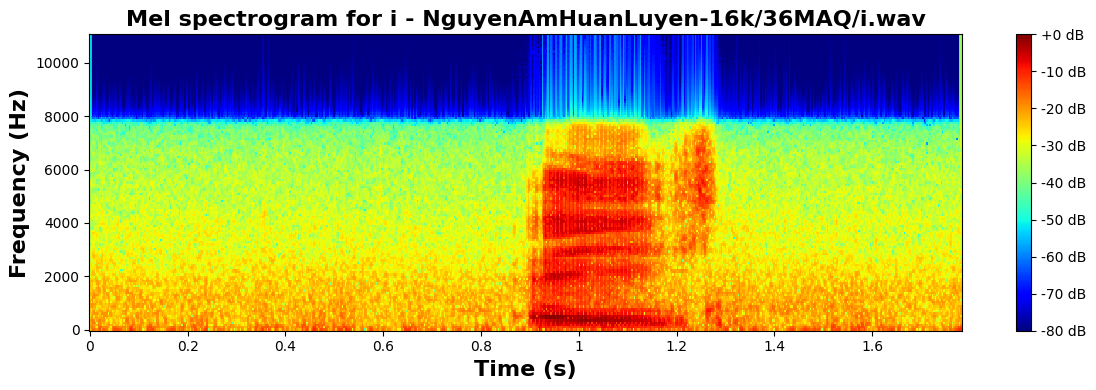

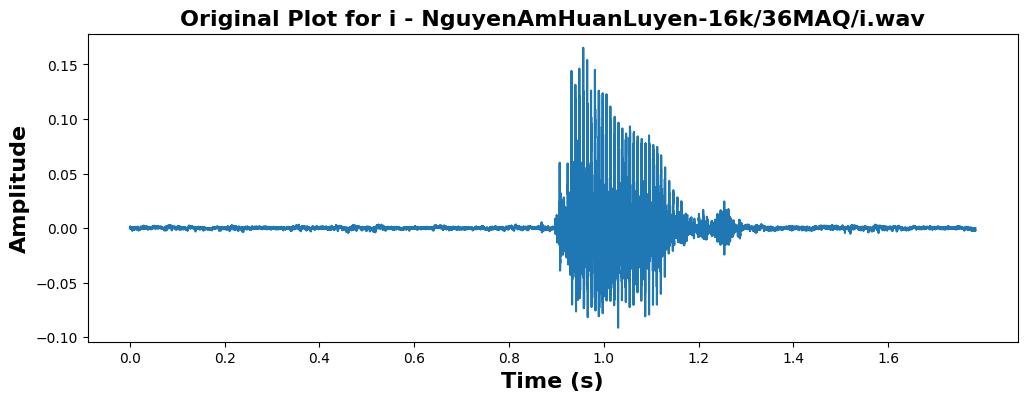

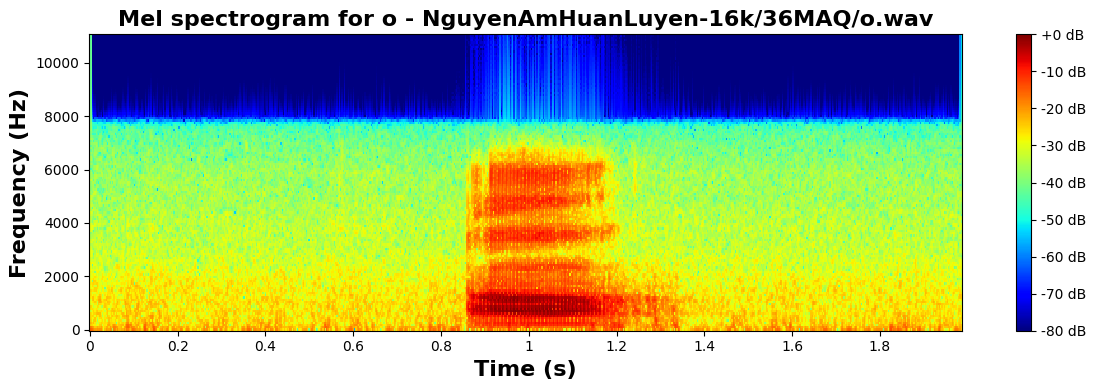

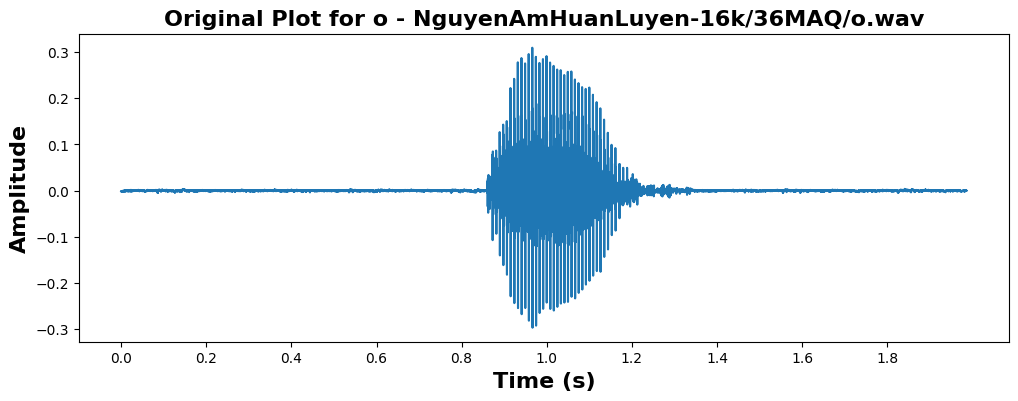

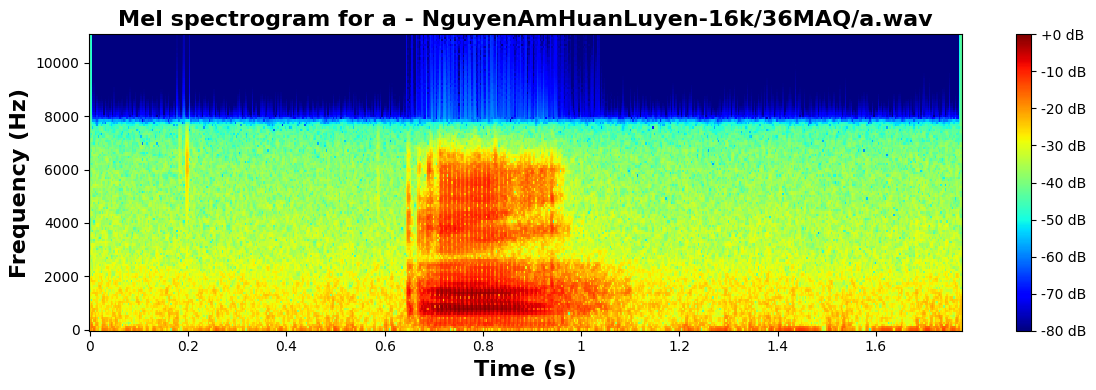

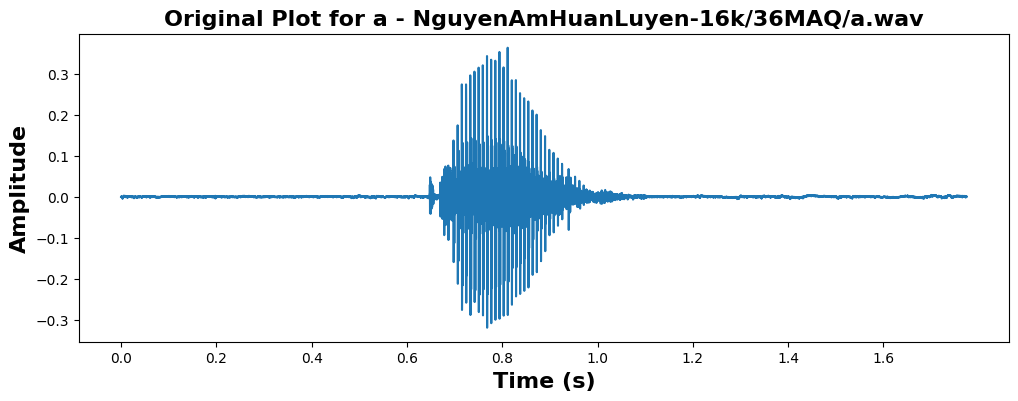

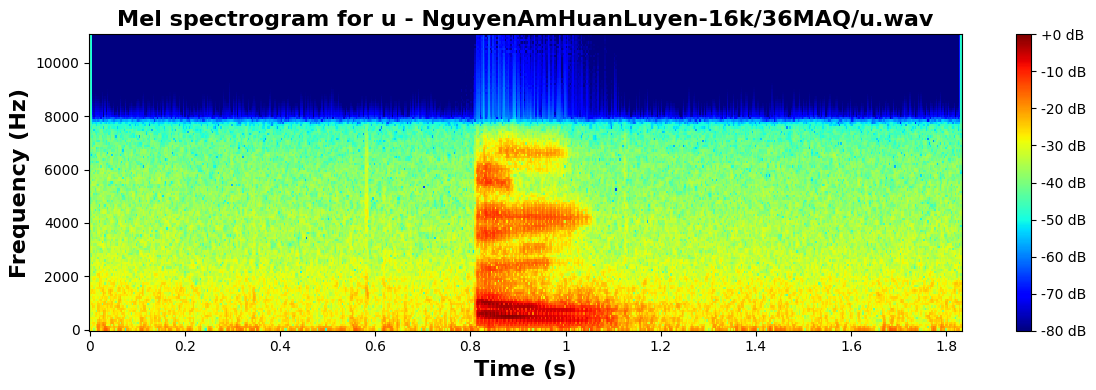

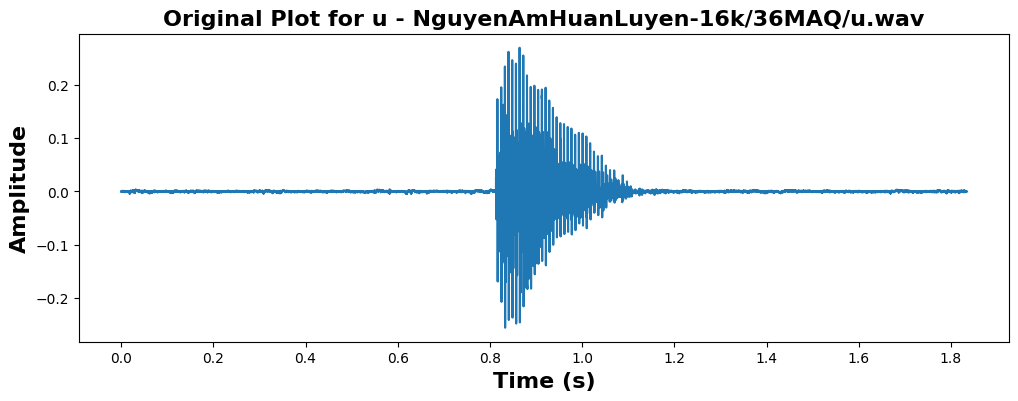

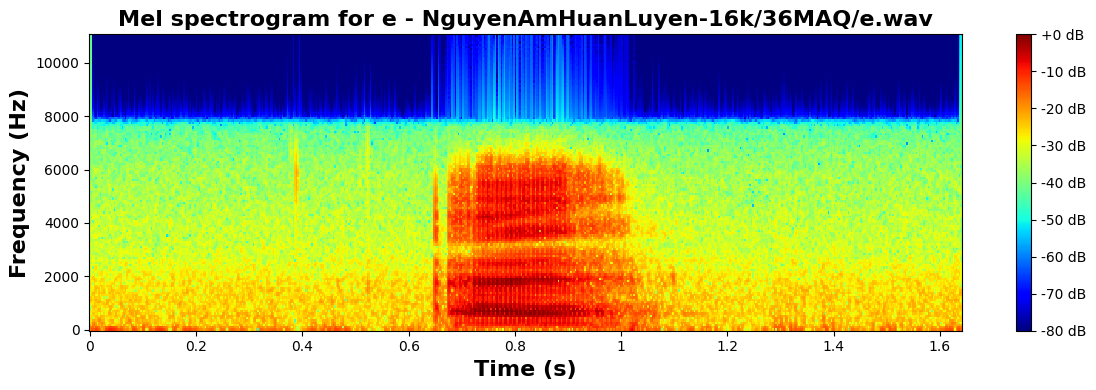

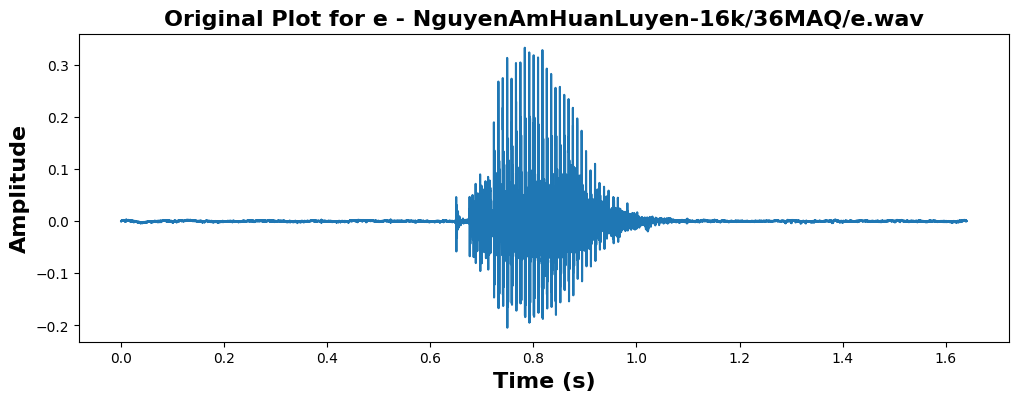

-------------------------------
-----------CHARTS FOR 35MMQ-----------


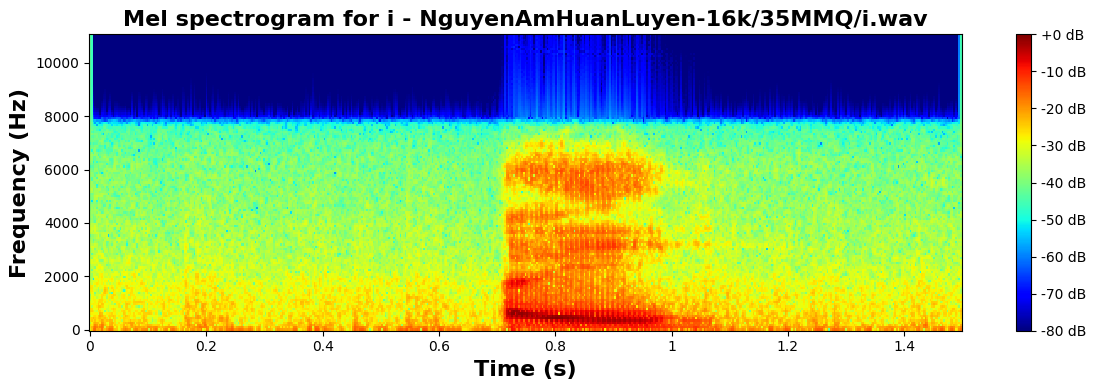

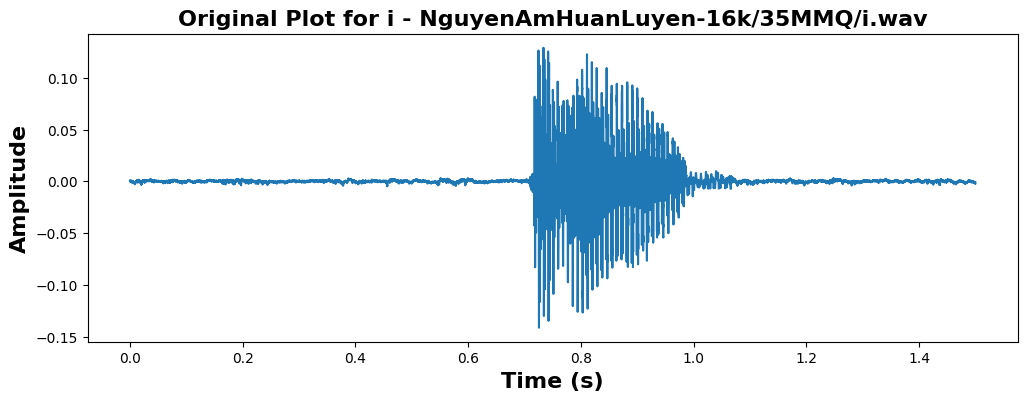

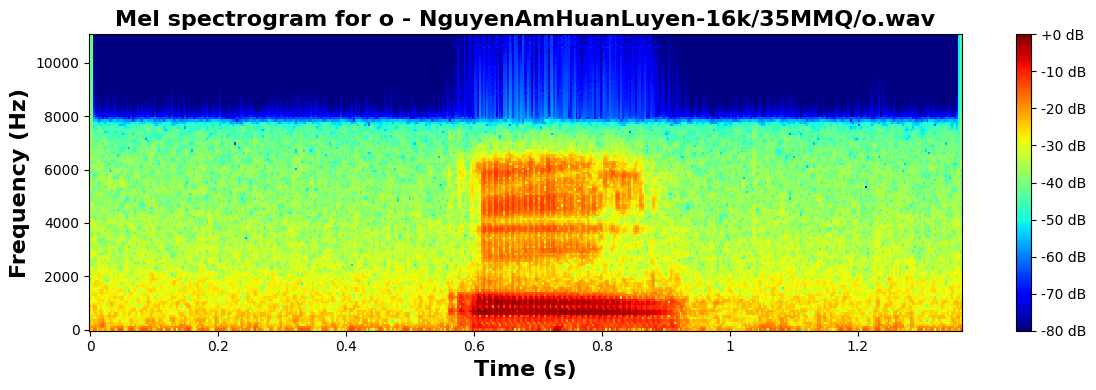

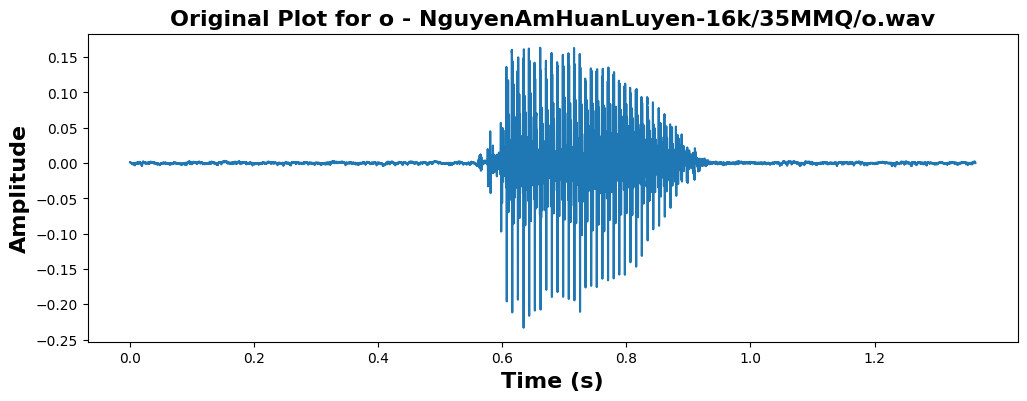

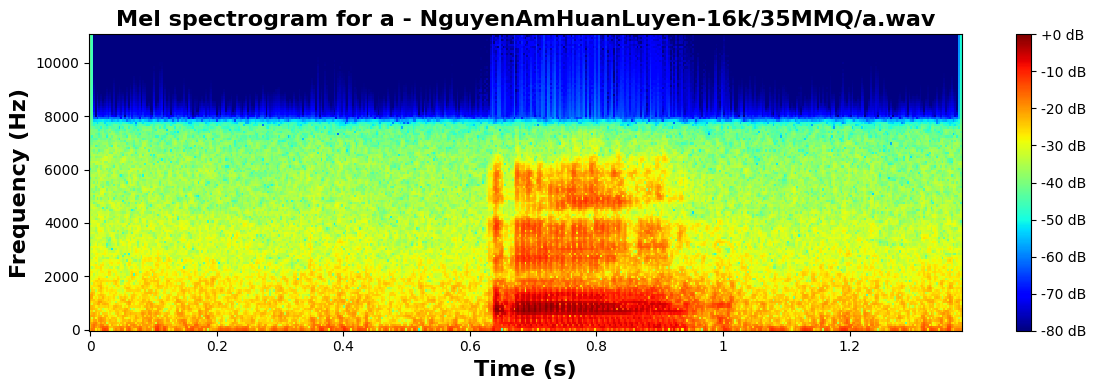

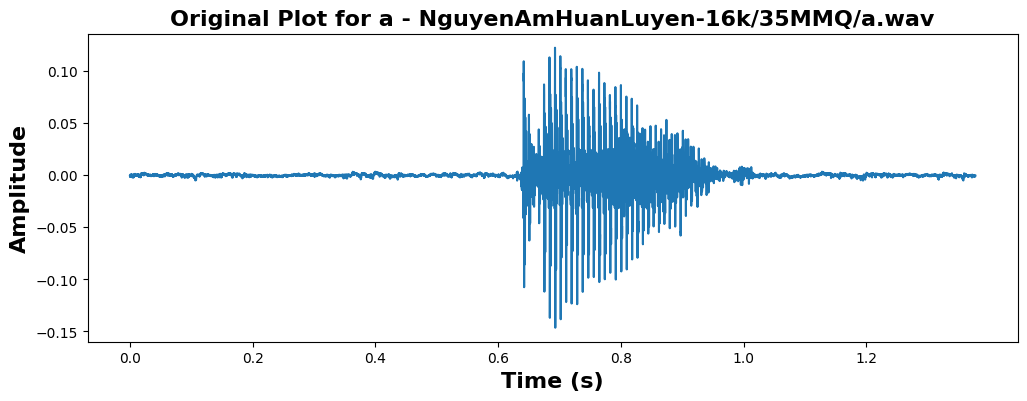

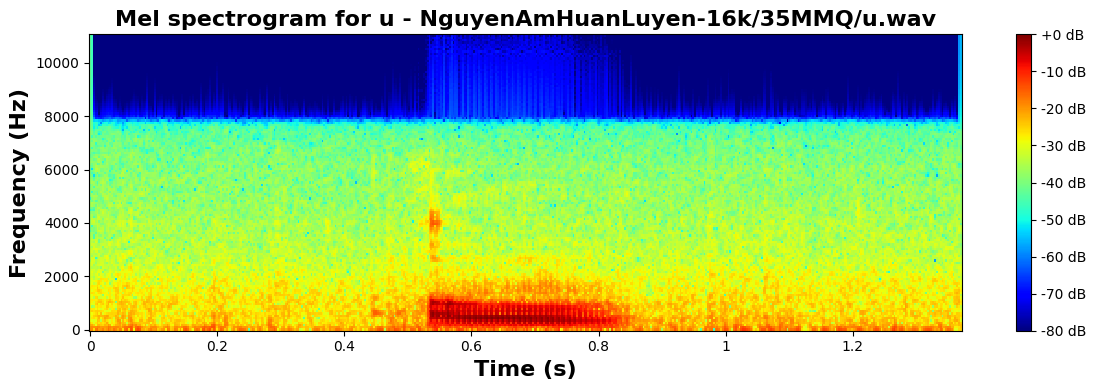

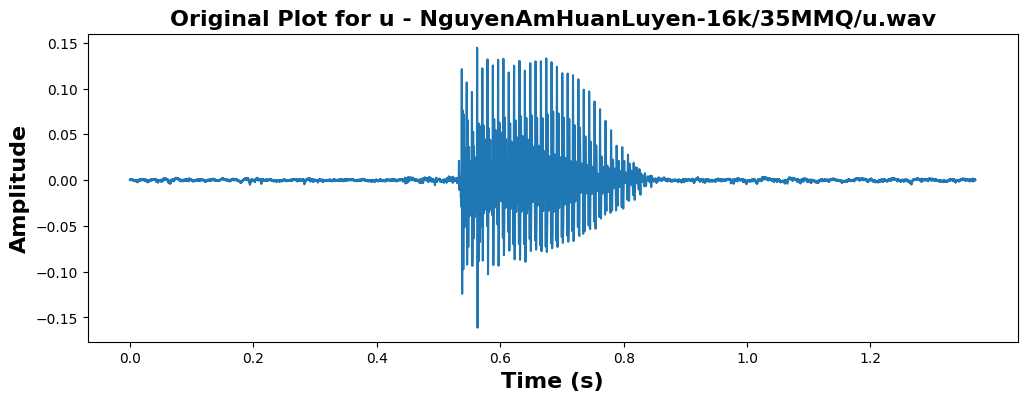

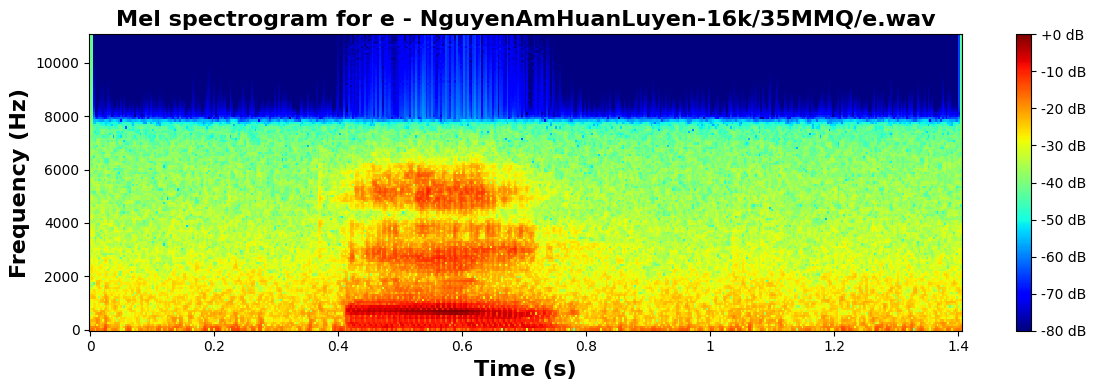

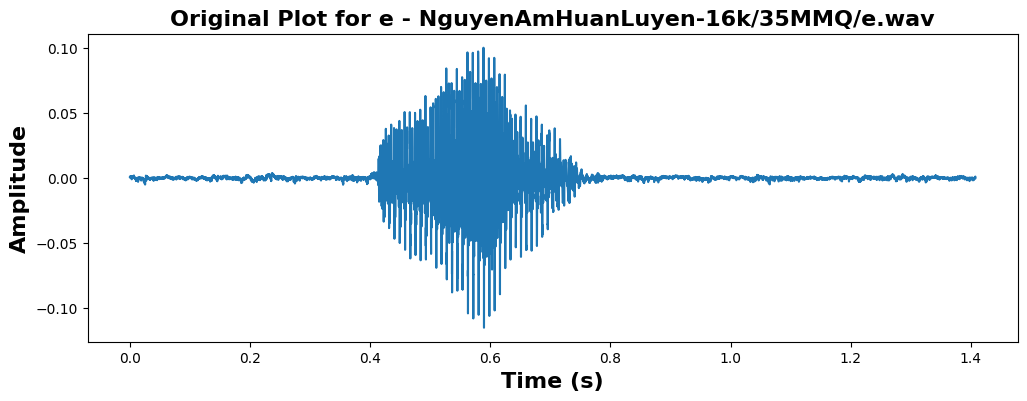

-------------------------------
-----------CHARTS FOR 30FTN-----------


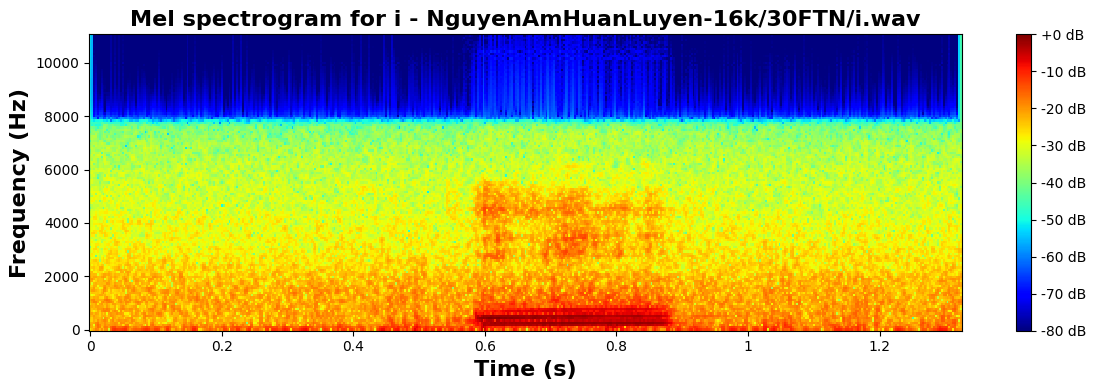

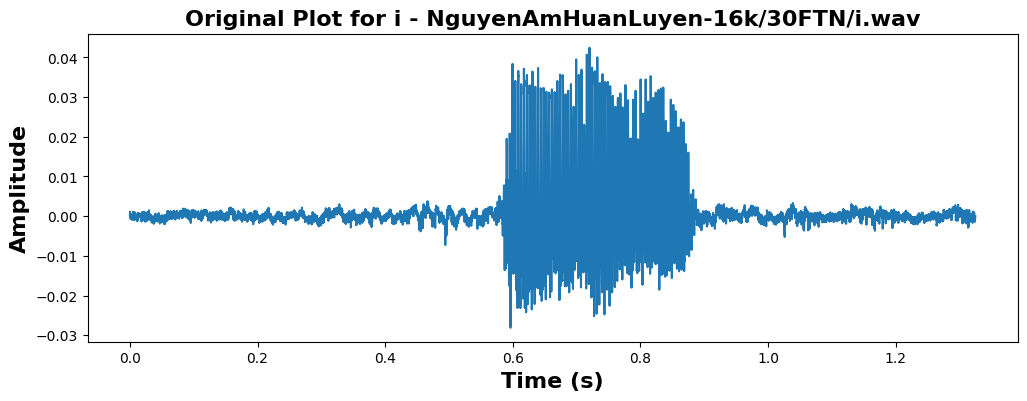

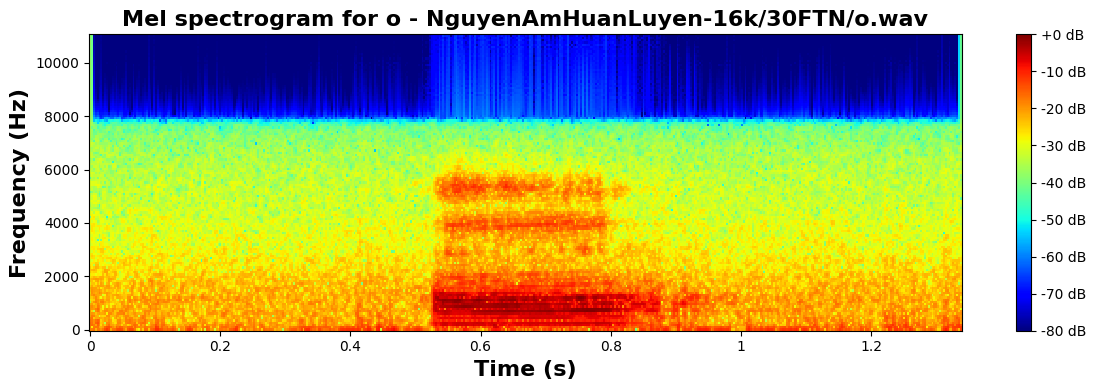

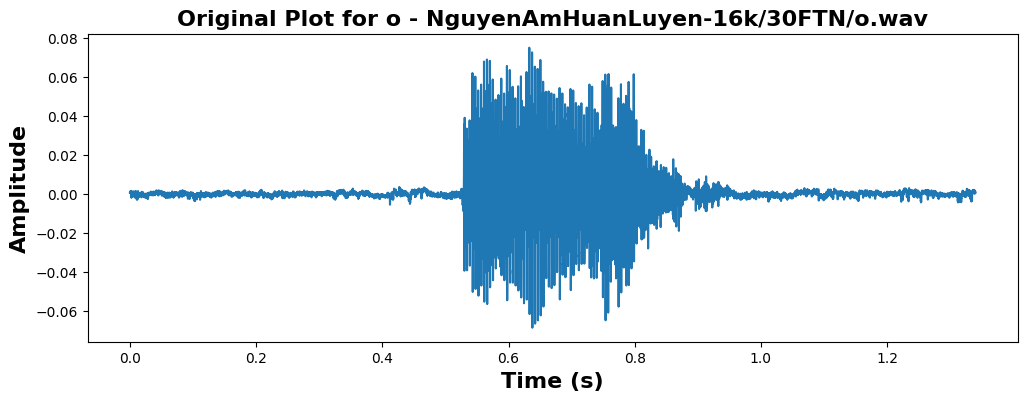

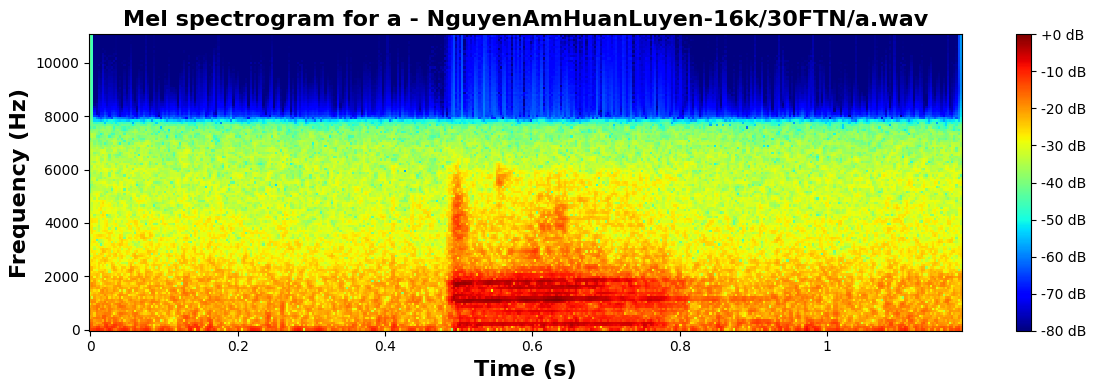

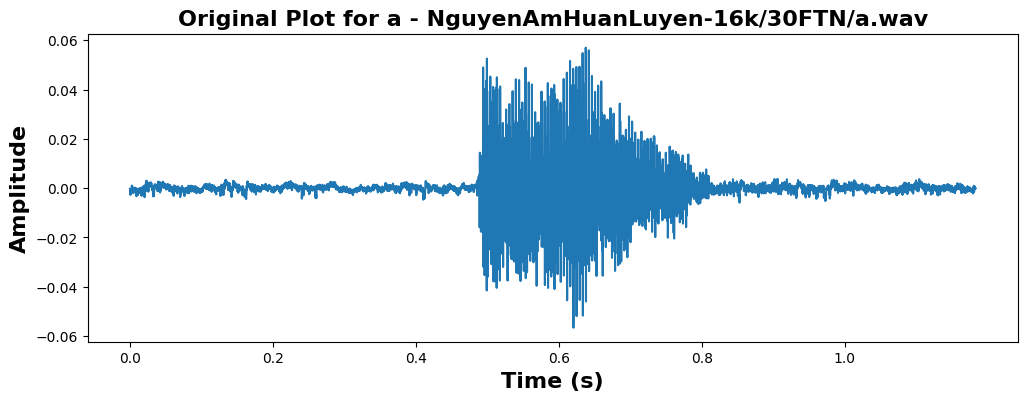

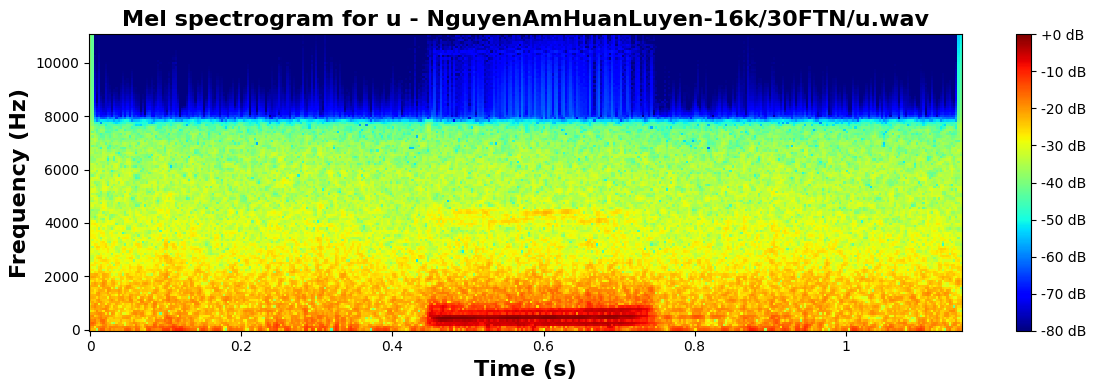

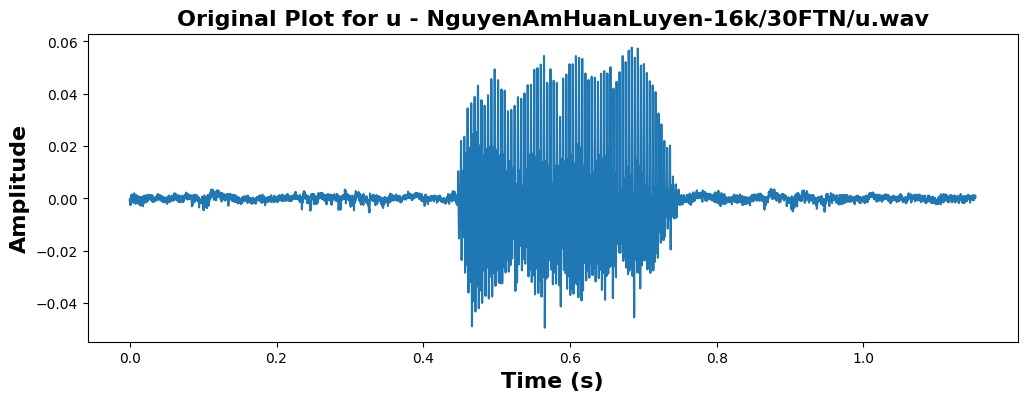

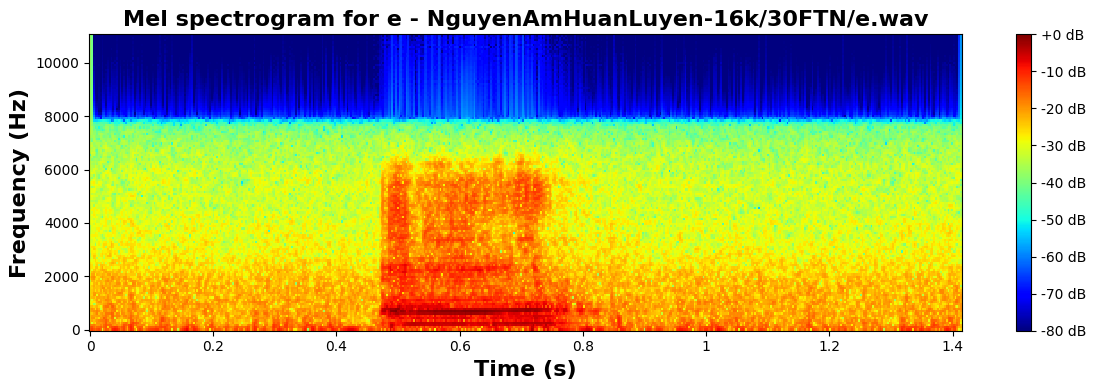

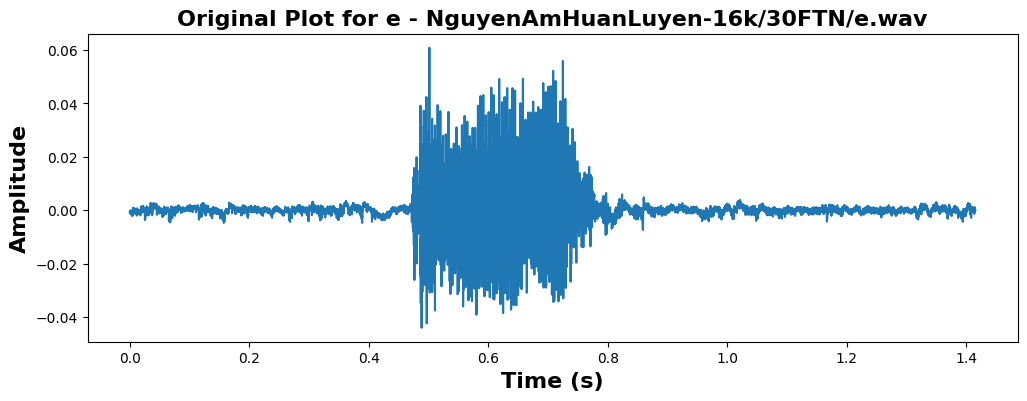

-------------------------------
-----------CHARTS FOR 27MCM-----------


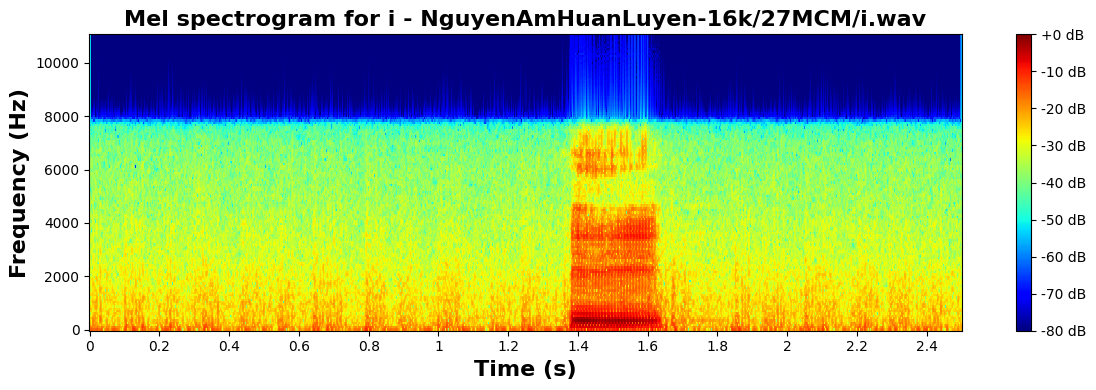

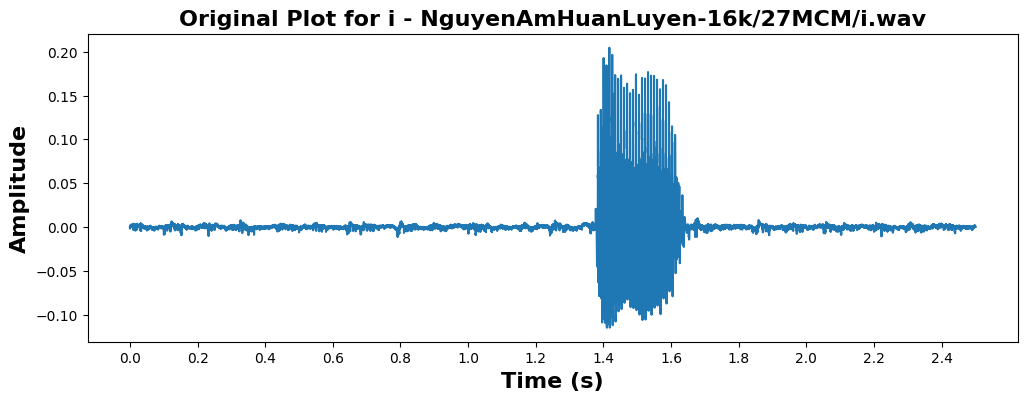

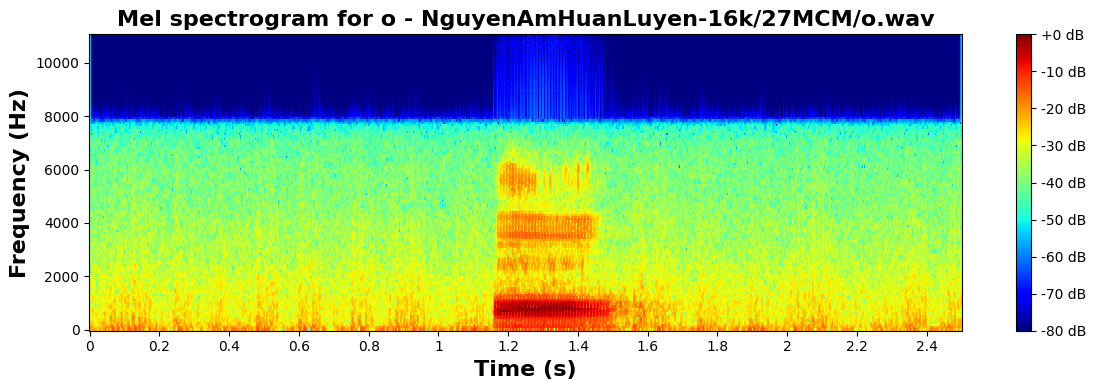

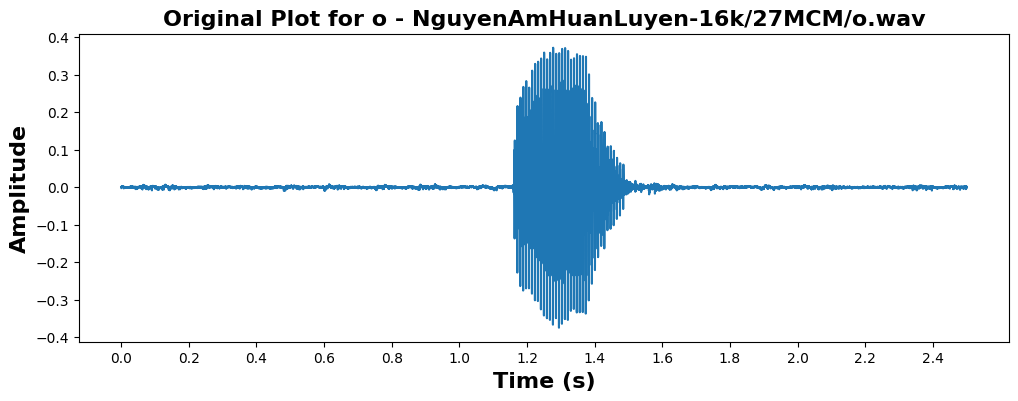

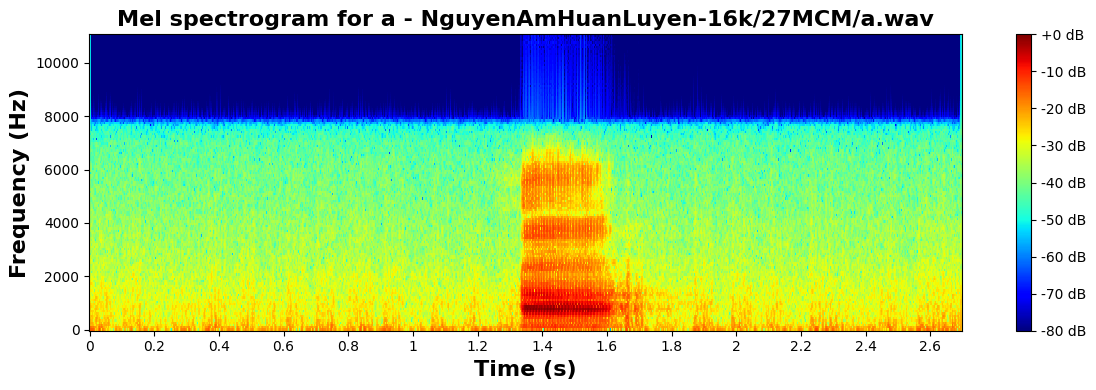

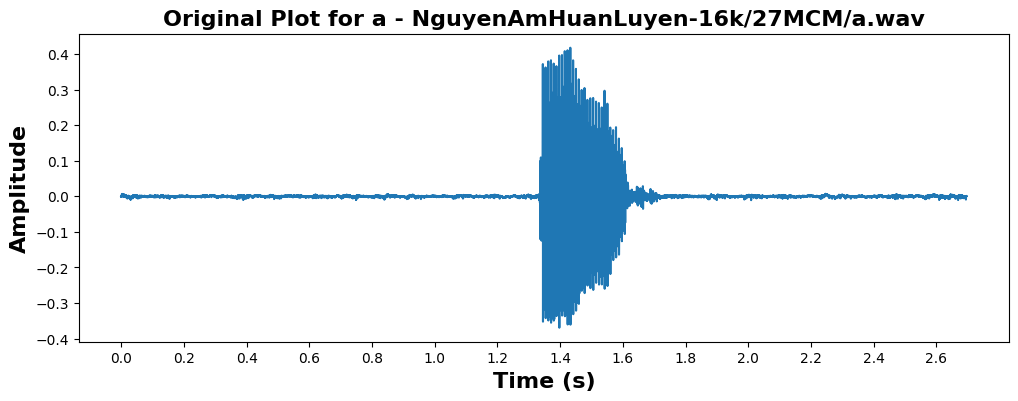

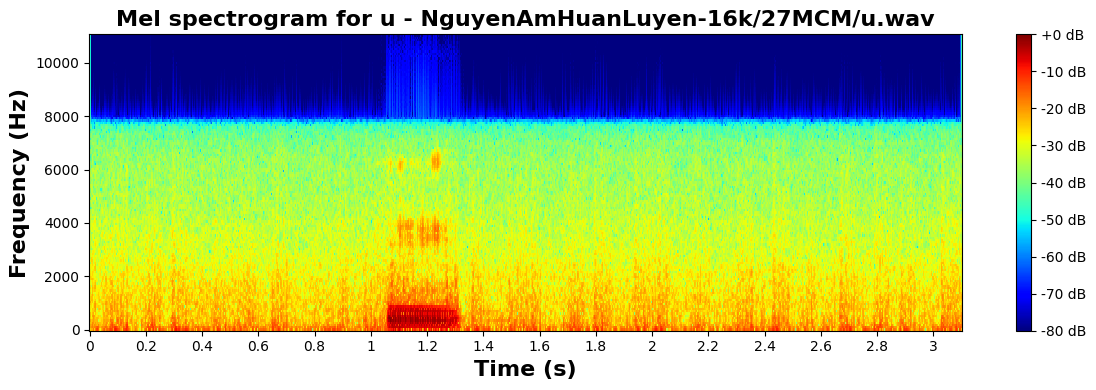

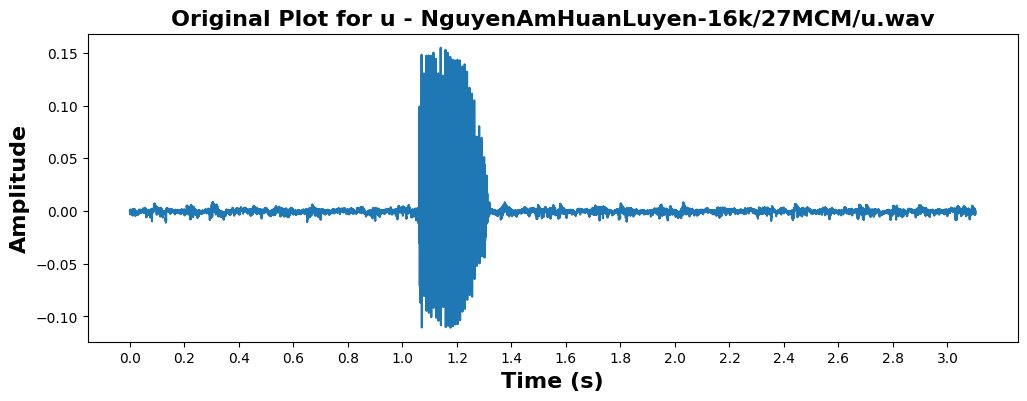

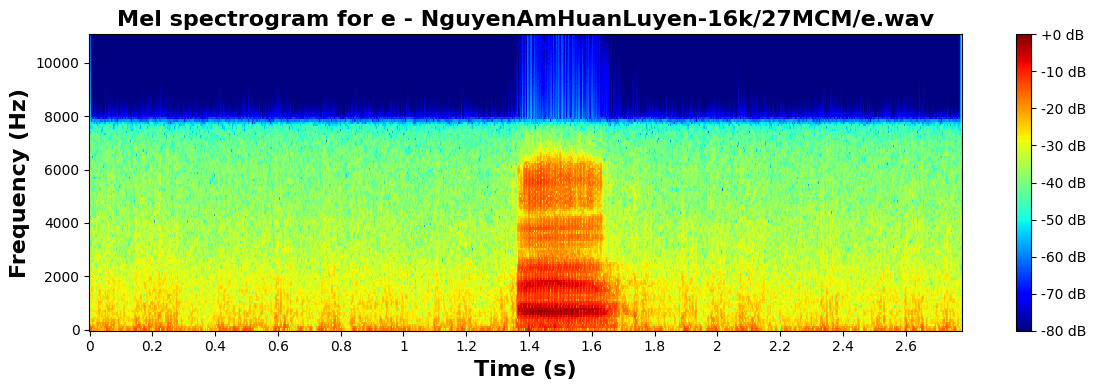

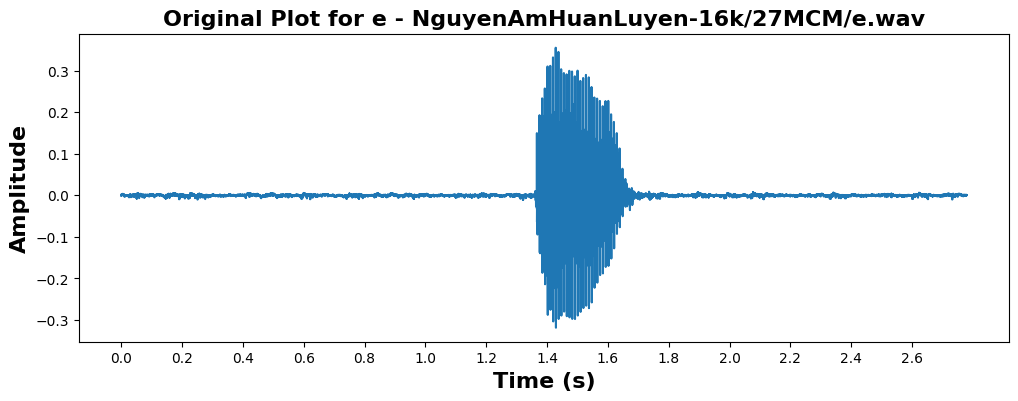

-------------------------------


In [15]:
for item in seletected_elements_folder_audio_data:
    print(f"-----------CHARTS FOR {item['folder_name']}-----------")
    for audio_path in item['audio_files']:
        vowel_file = audio_path.split('/')[-1]
        label_vowel = vowel_file.split('.')[0]
        # Load the audio file
        y, sr = librosa.load(audio_path)
        # Plot Mel spectrogram
        plot_mel_spectrogram(y=y, sr=sr, n_fft=256, hop_length=64, time_division=0.2, title=f'Mel spectrogram for {label_vowel} - {audio_path}')

        # Plot original audio file
        plot_original_audio(y=y, sr=sr, title=f'Original Plot for {label_vowel} - {audio_path}', time_division=0.2)

    print("-------------------------------")

